# Term Project

### 1. 주제 선정 이유

### 주제 : 전국의 자동심장충격기 배치 현황 분석 + 가장 근접한 AED 위치 표출 시스템
#### 저는 고등학교 시절 청소년 적십자회원으로서 활동을 했습니다. 그 때 심정지로 인해서 쓰러지는 사람들이 생각보다 많다는 것을 알게 되었습니다. 심정지가 왔을때 심장제세동기라 불리는 자동심장충격기가 큰 힘을 발휘한다는것도 알게 되었습니다. 저는 그 이후로 영화관이나 공공장소에서 자동심장충격기를 보았을때 저도 모르게 기분이 좋아졌습니다. 
#### 현재 우리나라의 심정지 환자 수는 2006년 인구 10만명당 37.5명에서 2011년 43.5명 2015년 44.2명으로 계속해서 증가하고 있습니다. 하지만 자동심장충격기는 우리 주변에서 쉽게 찾을 수 없었습니다. 그래서 저는 이번 Term Project에서 서울, 대전, 울산 세 도시의 자동심장충격기가 배치되어있는 현황에 대하여 분석해보려 합니다




#### 심정지 환자가 발생하였을때 신속하게 AED의 위치를 찾을 수 있게 위도와 경도를 이용하여 AED의 위치를 찾는 코드를 만들었습니다.
#### 실제로 AED를 사용해야할 상황이 오거나 AED의 위치를 미리 알고 싶을 때 가장 근접한 AED위치를 쉽게 알 수 있도록 지도에 위치를 표출하게 만들었습니다.

## 2. 가설 정의

### 가설 : 전국적으로 자동심장충격기가 인구수에 비해 부족할 것이다.
#### 청소년 적십자회 활동을 하면서도 우리 주변에 자동심장충격기가 부족하다는 이야기를 들어왔습니다. 그 이후로 2년이 넘는 시간이 지났지만 여전히 자동심장충격기가 인구수에 비해 부족할 것이라고 예상합니다

## 3. 인터넷을 통한 데이터 획득

### 서울시열린데이터 광장 - 서울시 자동심장충격기 정보(한국어)
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12979&srvType=S&serviceKind=1&currentPageNo=1
### 공공데이터포털 - 대전광역시 자동심장충격기
https://www.data.go.kr/dataset/15021621/fileData.do
### 공공데이터포탈 - 울산광역시 자동심장충격기 현황
https://www.data.go.kr/dataset/3072896/fileData.do
### 대전광역시 대전의 통계 - 주민등록 인구 현황
https://www.daejeon.go.kr/sta/StaStatisticsFldView.do?ntatcSeq=1252443857&menuSeq=180&colmn1Cont=C0201&colmn2Cont=C020101&boardId=normal_0009&pageIndex=1
### KOSIS 국가통계포털 -인구총조사
https://kosis.kr/search/search.do
http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN1502&vw_cd=MT_ZTITLE&list_id=A11_2015_1_10_10&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

#### (Korea_people.csv 파일은 기존 xlsx 파일을 불러오는데 문제가 있어 엑셀로 수정을 하여 제작하였습니다 추후 더 나은 방법을 찾게되면 수정하도록 하겠습니다.)

## 4. 분석을 위한 데이터의 가공

In [19]:
import pandas as pd
AED_daejeon= pd.read_csv('../2019102127/Daejeon_AED.csv',encoding = 'cp949')
del AED_daejeon['Unnamed: 4']
del AED_daejeon['성인아동범용여부']
del AED_daejeon['제조번호']
del AED_daejeon['제조사']
del AED_daejeon['운영담당자명']
del AED_daejeon['운영기관명']
del AED_daejeon['데이터기준일자']
del AED_daejeon['운영기관전화번호']
del AED_daejeon['설치유형']
del AED_daejeon['관리기관명']
AED_daejeon.rename(columns={AED_daejeon.columns[2]: '주소'}, inplace = True)
AED_daejeon.rename(columns={AED_daejeon.columns[5]: '전화번호'}, inplace = True)
AED_daejeon.head()
# 대전의 AED 현황을 정리한 파일을 불러와 제가 사용할 데이터들을 추렸습니다.

AED_ulsan = pd.read_csv('../2019102127/Ulsan_AED.csv', encoding = 'cp949')
del AED_ulsan['성인아동범용여부']
del AED_ulsan['제조번호']
del AED_ulsan['제조사']
del AED_ulsan['운영담당자명']
del AED_ulsan['운영기관명']
del AED_ulsan['데이터기준일자']
del AED_ulsan['운영기관전화번호']
del AED_ulsan['설치유형']
del AED_ulsan['소재지지번주소']
del AED_ulsan['관리기관명']
AED_ulsan.rename(columns={AED_ulsan.columns[2]: '주소'}, inplace = True)
AED_ulsan.rename(columns={AED_ulsan.columns[5]: '전화번호'}, inplace = True)
AED_ulsan.head()
# 울산의 AED 현황을 정리한 파일을 불러와 제가 사용할 데이터들을 추렸습니다.


Korea_people = pd.read_csv('../2019102127/Korea_people.csv', encoding = 'UTF-8')
del Korea_people['남']
del Korea_people['여']
del Korea_people['지역']
del Korea_people['남자']
del Korea_people['여자']
del Korea_people['성비']
del Korea_people['세대수']
del Korea_people['세대당인구']
                 
# 대한민국 인구 정리 파일을 불러와 제가 사용할 데이터들을 추렸습니다.

Korea_people.drop([0,2,3,4,5],inplace = True) 
Korea_people.rename(index={Korea_people.index[0]: '0'}, inplace = True)
Korea_people.rename(index={Korea_people.index[1]: '1'}, inplace = True)
Korea_people.rename(index={Korea_people.index[2]: '2'}, inplace = True)
Korea_people.head()

for i in range(8,18):    
    Korea_people.drop([i],inplace = True)   
Korea_people.head()
Korea_people.rename(columns={Korea_people.columns[1]: '총 인구수'}, inplace = True)
# 제가 임의로 파일을 수정했기 때문에 파일을 사용할 수 있게 작업했습니다.

AED_seoul = pd.read_csv('../2019102127/Seoul_AED.csv', encoding = 'UTF-8')
del AED_seoul['번호']
del AED_seoul['도로명주소']
del AED_seoul['행정시']
del AED_seoul['행정동']
del AED_seoul['행정구']
AED_seoul.rename(columns={AED_seoul.columns[0]: '설치기관명'}, inplace = True)
AED_seoul.head()
# 서울의 AED 현황을 정리한 파일을 불러와 데이터를 추렸습니다.

Korea_people2 = pd.read_csv('../2019102127/Korea_people2.csv', encoding=  'cp949')
# 추가적인 대한민국 인구&가구 정보를 알기위해 불러왔습니다.


Seoul_AED_N = AED_seoul.count()[1]
Daejeon_AED_N = AED_daejeon.count()[1]
Ulsan_AED_N = AED_ulsan.count()[1]
AED_data = pd.DataFrame({'도시 명':['서울특별시','대전광역시','울산광역시'],
                         'AED 개수':[Seoul_AED_N,  Daejeon_AED_N, Ulsan_AED_N]})

#정리한 데이터를 모으기 위해 데이터프레임을 만들었습니다.

AED_data['도시 면적(km^2)'] = ([605.2,539.8,1057])
AED_data['총 인구수'] = ([Korea_people['총 인구수'][0],Korea_people['총 인구수'][1],Korea_people['총 인구수'][2]])
AED_data['가구수'] = ([int(Korea_people2['2017.10'][5]),int(Korea_people2['2017.10'][83]),int(Korea_people2['2017.10'][89])])
AED_data['1인당 AED'] = (AED_data['AED 개수'] / AED_data['총 인구수'])
AED_data['1만명당 AED'] = (AED_data['1인당 AED']) * 10000
AED_data['1km^2당 AED'] = AED_data['AED 개수']/ AED_data['도시 면적(km^2)']
AED_data['가구수 대비 AED'] = AED_data['AED 개수'] / AED_data['가구수']

# 가공한 데이터들을 데이터프레임 안에 정리했습니다.

## 4-2 근접한 AED 표출 시스템

In [25]:

def calc_near_AED(pre_latitude, pre_longitude, latitude, longitude , file) :
    # 이 함수는 입력받은 위도와 경도 값을 이용하여 가장 근접한 AED의 위치를 찾아 알려주는 함수입니다. (KOR)
    # This function shows the location of the nearest AED using longitude and latitude. (ENG)
    for i in range(len(file)):
        set_latitude = float(file['위도'][i])
        set_longitude = float(file['경도'][i])
        if (latitude - pre_latitude)**2 + (longitude - pre_longitude)**2 > (latitude -set_latitude)**2 + (longitude - set_longitude)**2 :
            pre_latitude = set_latitude
            pre_longitude = set_longitude
            global latitude_inform
            latitude_inform = set_latitude
            global longitude_inform
            longitude_inform = set_longitude
            global AED_place
            AED_place = file['설치시설명'][i]
            global detail_place
            detail_place = file['상세설치장소'][i]
            global AED_address
            AED_address = file['주소'][i]
            global AED_call_number
            AED_call_number = file['전화번호'][i]
            
        else :
            continue
        
    print('현재 위치와 가장 가까운 설치장소는 ', AED_place ,'입니다.')
    your_dicision = input(prompt = '더 자세한 정보를 불러올까요? (Y/N)')
    
    if your_dicision == 'Y' or 'y' or 'yes' or 'Yes':
        print('상세설치장소 : ',detail_place)
        print('주소 : ', AED_address)
        print('전화번호 : ',AED_call_number)
        print('위도 : ',latitude_inform)
        print('경도 : ',longitude_inform)
    elif your_dicision =='N' or 'n' or 'no' or 'No' : 
        print('다음에 또 이용해 주세요.')
    else : 
        print('정확히 입력하였는지 확인 후 다시 시도해 주시기 바랍니다.')

global latitude
global longitude

city = input('지금 위치하고 있는 도시 :')
if (city ==  '대전') :
    latitude = float(input('현재 위치의 위도는? '))
    longitude = float(input('현재 위치의 경도는? '))
    pre_latitude = -500
    pre_longitude = -500
    calc_near_AED(pre_latitude, pre_longitude, latitude, longitude , AED_daejeon)
    
elif (city == '울산') :
    latitude = float(input('현재 위치의 위도는? '))
    longitude = float(input('현재 위치의 경도는? '))
    pre_latitude = -500
    pre_longitude = -500
    calc_near_AED(pre_latitude, pre_longitude, latitude, longitude, AED_ulsan)
else :
    print('죄송합니다. 현재 울산과 대전의 데이터만을 제공하고 있습니다. 정확히 입력하였는지 확인해 주십시오.')

print('붉은색 마커 = AED의 위치')
print('푸른색 마커 = 현재 위치')

import folium
AED_map = folium.Map(location=[latitude_inform, longitude_inform],zoom_start=14)
folium.Marker([latitude_inform,longitude_inform], popup = AED_place,
             icon=folium.Icon(color ='red')).add_to(AED_map)
folium.Marker([latitude,longitude], popup = AED_place,
             icon=folium.Icon(color = 'blue')).add_to(AED_map)
AED_map


지금 위치하고 있는 도시 :대전
현재 위치의 위도는? 36.4488806
현재 위치의 경도는? 127.4344168
현재 위치와 가장 가까운 설치장소는  신탄진평생학습도서관 입니다.
더 자세한 정보를 불러올까요? (Y/N)Y
상세설치장소 :  1층로비
주소 :  대전광역시 대덕구 신탄진동로 64
전화번호 :  042-608-5532
위도 :  36.44650549
경도 :  127.4373309
붉은색 마커 = AED의 위치
푸른색 마커 = 현재 위치


## 5. 분석 결과 도출

In [26]:
AED_data

,도시 명,AED 개수,도시 면적(km^2),총 인구수,가구수,1인당 AED,1만명당 AED,1km^2당 AED,가구수 대비 AED
0,서울특별시,100,605.2,9766886,3813260,0.000010,0.102387,0.165235,0.000026
1,대전광역시,139,539.8,1485509,597736,0.000094,0.935706,0.257503,0.000233
2,울산광역시,112,1057.0,1152293,428720,0.000097,0.971975,0.105960,0.000261


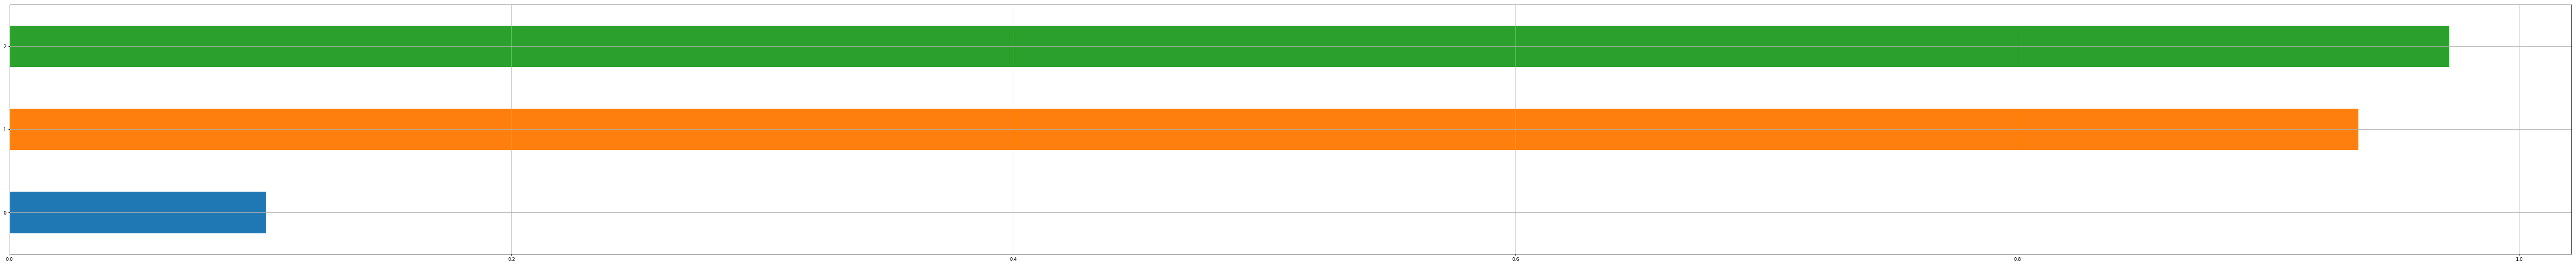

In [28]:
import matplotlib.pyplot as plt
AED_data['1만명당 AED'].plot(kind = 'barh', grid=True, figsize=(100,10))

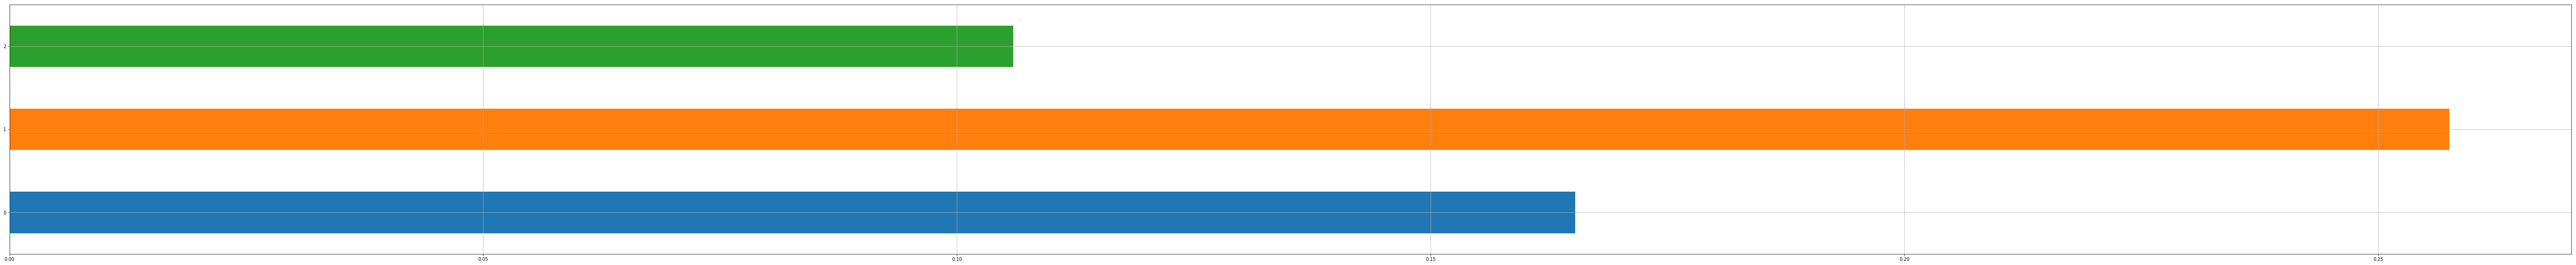

In [29]:
AED_data['1km^2당 AED'].plot(kind = 'barh', grid=True, figsize=(100,10))

In [30]:
AED_map

## 6. 결론

#### AED 개수는 서울, 대전, 울산에서 각각 100, 139 ,112 개로 나타났다. 세 도시 중 대전에 가장 많은 수의 AED가 있었다. 
#### 1만명당 AED 개수 와 가구수 대비 AED 에서는 서울이 타 지역보다 매우 낮았다. 이것은 서울이 대전과 울산에 비해 인구와 가구수가 매우 많았기 때문에 큰 의미를 둘 수 없었다.
#### 총 면적 36,193 km^2 의 타이완에서는 전국에 6151개의 AED가 있어 1km^2당 약 0.17개 수준으로 보급되어있다. 이는 분석한 데이터의 서울과 비슷한 수준이다. 하지만 타이완은 전국을 대상으로 한 수치이기 때문에 대도시인 서울에 AED보급이 타이완보다 더디다고 할 수 있다.
#### 이웃나라 일본에서는 2006년에만 4만5천개의 AED가 판매될 정도로 AED 보급이 잘 되어있다. 데이터를 보았을때 일본에 비해 AED 보급률이 저조하다고 할 수 있다.

### 결론적으로 분석한 데이터를 보면 아직 우리나라의 AED 보급률이 높지 않다는 것을 알 수 있었다.


## 7. 참고문헌

#### 대한심폐소생협회 - 국내 자동심장충격기 보급 현광과 사용실태
http://www.kacpr.org/board/newsletter_download.php?idx=31815&no=2&download=1&code=newsletter
#### 파이썬으로 데이터 주무르기 (저자 민형기 비제이퍼블릭)
#### The utilization of automated external defibrillators in Taiwan 
https://www.sciencedirect.com/science/article/pii/S0929664617306320?via%3Dihub - 타이완의 AED 개수
#### Automated External Defibrillator -The Japan Times
https://www.japantimes.co.jp/news/2007/04/17/reference/automated-external-defibrillator/#.XP0qBogzaUk

## 8. 별첨1

In [8]:
AED_daejeon_2 = pd.read_csv('../2019102127/Daejeon_AED.csv', encoding = 'cp949')
AED_daejeon_2

,설치시설명,상세설치장소,설치유형,소재지도로명주소,Unnamed: 4,위도,경도,성인아동범용여부,제조사,제조번호,운영담당자명,운영기관전화번호,운영기관명,관리기관전화번호,관리기관명,데이터기준일자
0,도시철도공사판암역,지하 1층 역무실 앞,캐비넷방식고정형,대전광역시 동구 옥천로 지하162,NaN,36.317025,127.458633,NaN,(주)씨유메디컬,PRIH20B1980,노광현(유선:042-274-3101,042-274-3101,도시철도공사판암역,042-274-3101,도시철도공사판암역,2018-08-21
1,ktlinkus(주)중부본부대전지사,진잠타운 상가,장비부착고정형,대전광역시 서구 괴정동 359-2 KT인재개발원 별관1호,NaN,36.296818,127.321208,NaN,나눔테크,NT180K1300279,김정회,042-531-0030,ktlinkus(주)중부본부대전지사,042-531-0030,ktlinkus(주)중부본부대전지사,2018-08-21
2,남부여성가족원,1층 입구 전시실,캐비넷방식고정형,대전광역시 동구 동구청로 36,NaN,36.301875,127.460307,NaN,(주)씨유메디컬,RP1H20B00054,정계인,042-270-7753,남부여성가족원,042-270-7753,남부여성가족원,2018-08-21
3,대전광역시도시철도공사(서구지역),용문역 외삼방향 대합실,캐비넷방식고정형,대전광역시 서구 월평동 160-20,NaN,36.338270,127.393280,NaN,(주)씨유메디컬시스템,RP2149B0186,이슬기,042-539-3213,대전광역시도시철도공사(서구지역),042-539-3213,대전광역시도시철도공사(서구지역),2018-08-21
4,대전광역시여성가족원,1층 로비,캐비넷방식고정형,대전광역시 서구 배재로 181,NaN,36.324683,127.369784,NaN,(주)씨유메디컬시스템,RP1H20B0022,이진영(팩스:042-270-7609),042-270-7612,대전광역시여성가족원,042-270-7612,대전광역시여성가족원,2018-08-21
5,대전광역시립제1노인전문병원,3층 로비,캐비넷방식고정형,대전광역시 유성구 유성대로 1422,NaN,36.405135,127.373470,NaN,(주)메디아나,1.20E+11,유수인,042-862-0023,대전광역시립제1노인전문병원,042-862-0023,대전광역시립제1노인전문병원,2018-08-21
6,동구국민체육센터,1층 로비,캐비넷방식고정형,대전광역시 동구 가양로 9,NaN,36.339469,127.438149,NaN,필립스,B10H-04294,김충신,042-624-6400,동구국민체육센터,042-624-6400,동구국민체육센터,2018-08-21
7,대전광역시립제1노인전문병원,2층 로비,캐비넷방식고정형,대전광역시 유성구 유성대로 1422,NaN,36.405135,127.373470,NaN,(주)메디아나,1.20E+11,유수인,042-862-0023,대전광역시립제1노인전문병원,042-862-0023,대전광역시립제1노인전문병원,2018-08-21
8,대전시립미술관,대전시립미술관1층 전시안내실,캐비넷방식고정형,대전광역시 서구 둔산대로 155,NaN,36.367049,127.385727,NaN,미국 필립스,B10H03991,김태형,042-270-7331,대전시립미술관,042-270-7331,대전시립미술관,2018-08-21
9,대전광역시도시철도공사(서구지역),시청역 대합실,캐비넷방식고정형,대전광역시 서구 월평동 160-20,NaN,36.351409,127.386715,NaN,(주)씨유메디컬시스템,RP1H20B0095,이건순,042-539-3213,대전광역시도시철도공사(서구지역),042-539-3213,대전광역시도시철도공사(서구지역),2018-08-21


In [9]:
AED_ulsan_2 = pd.read_csv('../2019102127/Ulsan_AED.csv', encoding = 'cp949')
AED_ulsan_2

,설치시설명,상세설치장소,설치유형,소재지도로명주소,소재지지번주소,위도,경도,성인아동범용여부,제조사,제조번호,운영담당자명,운영기관전화번호,운영기관명,관리기관전화번호,관리기관명,데이터기준일자
0,울산시설공단 울산대공원,울산대공원 현충탑 청원경찰실,캐비넷방식고정형,울산광역시 남구 대공원로 94,NaN,35.527162,129.292481,N,(주)라디안,NaN,오창환,052-226-0453,울산시설공단 울산대공원,052-226-0453,울산광역시 시설관리공단,2018-08-29
1,케이티링커스동부지사,경진여객 앞 도로,장비부착고정형,울산광역시 남구 대학로 52,NaN,35.539890,129.257526,N,한국/(주)나눔테크,NT18C-14-02354,강영관,052-276-6550,케이티링커스동부지사,052-276-6550,케이티링커스동부지사,2018-08-29
2,케이티링커스동부지사,롯데마트정문 앞 도로,장비부착고정형,울산광역시 남구 삼산로 74,NaN,35.534138,129.315404,N,한국/(주)나눔테크,NT18C-14-02173,강영관,052-276-6550,케이티링커스동부지사,052-276-6550,케이티링커스동부지사,2018-08-29
3,케이티링커스동부지사,목화예식장 앞 도로,장비부착고정형,울산광역시 남구 삼산로 226,NaN,35.538107,129.331977,N,한국/(주)나눔테크,NT18C-14-02355,강영관,052-276-6550,케이티링커스동부지사,052-276-6550,케이티링커스동부지사,2018-08-29
4,케이티링커스동부지사,새동아약국 앞 도로,장비부착고정형,울산광역시 남구 중앙로 304,NaN,35.547656,129.309200,N,한국/(주)나눔테크,NT18C-14-02784,강영관,052-276-6550,케이티링커스동부지사,052-276-6550,케이티링커스동부지사,2018-08-29
5,평창2차현대아파트,관리동 1층 출입문 입구,캐비넷방식고정형,울산광역시 남구 삼산중로 110,NaN,35.543425,129.336347,N,(주)라디안,D-01116050743,이대걸,052-268-2474,평창2차현대아파트,052-268-2474,평창2차현대아파트,2018-08-29
6,(주)삼양제넥스,전분당 2층,캐비넷방식고정형,울산광역시 남구 매암로 115,NaN,35.517694,129.373278,N,nihon-kohden,532,박진헌,052-278-2541,(주)삼양제넥스,052-278-2541,(주)삼양제넥스,2018-08-29
7,(주)삼양제넥스,사무동 출입문 입구,캐비넷방식고정형,울산광역시 남구 매암로 115,NaN,35.518026,129.373180,N,USA/PHILIPS,B10E-00543,박진헌,052-278-2541,(주)삼양제넥스,052-278-2541,(주)삼양제넥스,2018-08-29
8,CGV울산삼산,업스퀘어 5층 CGV 투썸 옆,캐비넷방식고정형,울산광역시 남구 삼산동 1569-1,NaN,35.541181,129.338907,N,대한민국/(주)나눔테크,NT18C-13-02583,박진헌,052-990-5532,CGV울산삼산,052-990-5532,CGV울산삼산,2018-08-29
9,강변센트럴하이츠,정문 초소 안,장비부착고정형,울산광역시 남구 중앙로290번길 53,NaN,35.548137,129.314852,N,니혼코덴코리아,6618,김민국,052-256-0215,강변센트럴하이츠,052-256-0215,강변센트럴하이츠,2018-08-29


In [10]:
Korea_people_2 = pd.read_csv('../2019102127/Korea_people.csv', encoding = 'UTF-8')
Korea_people_2

,도시 명,계,남,여,지역,남자,여자,성비,세대수,세대당인구
0,합 계,51836763,"25,867,727","25,969,036",100.00,49.90,50.10,99.61,"22,212,339",2.33
1,서울특별시,9766886,"4,769,474","4,997,412",18.84,9.20,9.64,95.44,"4,296,066",2.27
2,부산광역시,3431750,"1,686,235","1,745,515",6.62,3.25,3.37,96.60,"1,487,469",2.31
3,대구광역시,2454154,"1,214,640","1,239,514",4.73,2.34,2.39,97.99,"1,025,515",2.39
4,인천광역시,2956700,"1,482,820","1,473,880",5.70,2.86,2.84,100.61,"1,222,515",2.42
5,광주광역시,1458940,"722,495","736,445",2.81,1.39,1.42,98.11,"608,121",2.40
6,대전광역시,1485509,"742,095","743,414",2.87,1.43,1.43,99.82,"629,623",2.36
7,울산광역시,1152293,"592,037","560,256",2.22,1.14,1.08,105.67,"464,318",2.48
8,세종특별자치시,324417,"161,944","162,473",0.63,0.31,0.31,99.67,"128,330",2.53
9,경기도,13129508,"6,605,143","6,524,365",25.33,12.74,12.59,101.24,"5,363,723",2.45


In [11]:
AED_seoul_2 = pd.read_csv('../2019102127/Seoul_AED.csv', encoding = 'UTF-8')
AED_seoul_2

,번호,명칭,주소,도로명주소,행정시,행정구,행정동,전화번호,설치장소
0,BE_LiST28-0030,한국공항공사,서울특별시 강서구 공항동 150,NaN,서울특별시,강서구,공항동,02-2660-4045,국내선 1층 격리대합실
1,BE_LiST28-0031,은평구보건소,서울특별시 은평구 녹번동 84,NaN,서울특별시,은평구,녹번동,02-351-8263,민원대기실 1층
2,BE_LiST28-0032,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,NaN,서울특별시,용산구,한강로동,02-3780-5810,용산역 12
3,BE_LiST28-0033,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,NaN,서울특별시,용산구,한강로동,02-3780-5810,용산역 9
4,BE_LiST28-0034,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,NaN,서울특별시,용산구,한강로동,02-3780-5810,용산역 7
5,BE_LiST28-0035,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,NaN,서울특별시,용산구,한강로동,02-3780-5810,용산역 3층 맞이방 동쪽 화단 근처
6,BE_LiST28-0036,방위사업청,서울특별시 용산구 용산동2가 2-15,NaN,서울특별시,용산구,용산2가동,02-2079-6604,투명관 1층 중앙현관
7,BE_LiST28-0037,방위사업청,서울특별시 용산구 용산동2가 2-15,NaN,서울특별시,용산구,용산2가동,02-2079-6604,청렴관 1층 중앙현관
8,BE_LiST28-0038,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,NaN,서울특별시,용산구,한강로동,02-3780-5810,용산역 3층 북쪽 타는 곳
9,BE_LiST28-0039,국방부 근무지원단,서울특별시 용산구 용산동3가 1 대한민국 국방부,NaN,서울특별시,용산구,한강로동,02-748-1173,본관 지하1층 식당입구 좌측


In [13]:
Korea_people_3 = pd.read_csv('../2019102127/Korea_people2.csv', encoding = 'cp949')
Korea_people_3

,행정구역별(읍면동),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,...,2017.10,2017.11,2017.12,2017.13,2017.14,2017.15,2017.16,2017.17,2017.18,2017.19
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
1,전국,51422507,25768055,25654452,49943260,24922392,25020868,1479247,845663,633584,...,19673875,15949,478098,17122573,3963072,10375363,502514,2072905,208719,773847
2,읍부,4794377,2456558,2337819,4625994,2347613,2278381,168383,108945,59438,...,1798810,2277,45814,1749920,560283,959130,71398,131130,27979,62526
3,면부,4835090,2498157,2336933,4592308,2324414,2267894,242782,173743,69039,...,1993849,4055,54669,2064742,1538966,389938,34592,70152,31094,96877
4,동부,41793040,20813340,20979700,40724958,20250365,20474593,1068082,562975,505107,...,15881216,9617,377615,13307911,1863823,9026295,396524,1871623,149646,614444
5,서울특별시,9741871,4757642,4984229,9397944,4592393,4805551,343927,165249,178678,...,3813260,2246,133344,2866845,331863,1665922,114352,724932,29776,194627
6,종로구,157277,76670,80607,146298,71757,74541,10979,4913,6066,...,62372,124,4215,45787,12920,14507,5451,11978,931,4859
7,중구,127896,62195,65701,117631,57391,60240,10265,4804,5461,...,52208,89,3942,39512,6308,23874,1948,6491,891,4773
8,용산구,223898,108471,115427,207893,99759,108134,16005,8712,7293,...,91102,85,5788,71356,14993,35648,3985,15988,742,4790
9,성동구,302367,149060,153307,291931,144018,147913,10436,5042,5394,...,120957,75,4389,86650,11044,62985,2055,9470,1096,5432


## 9. 별첨2

In [14]:
AED_daejeon

,설치시설명,상세설치장소,주소,위도,경도,전화번호
0,도시철도공사판암역,지하 1층 역무실 앞,대전광역시 동구 옥천로 지하162,36.317025,127.458633,042-274-3101
1,ktlinkus(주)중부본부대전지사,진잠타운 상가,대전광역시 서구 괴정동 359-2 KT인재개발원 별관1호,36.296818,127.321208,042-531-0030
2,남부여성가족원,1층 입구 전시실,대전광역시 동구 동구청로 36,36.301875,127.460307,042-270-7753
3,대전광역시도시철도공사(서구지역),용문역 외삼방향 대합실,대전광역시 서구 월평동 160-20,36.338270,127.393280,042-539-3213
4,대전광역시여성가족원,1층 로비,대전광역시 서구 배재로 181,36.324683,127.369784,042-270-7612
5,대전광역시립제1노인전문병원,3층 로비,대전광역시 유성구 유성대로 1422,36.405135,127.373470,042-862-0023
6,동구국민체육센터,1층 로비,대전광역시 동구 가양로 9,36.339469,127.438149,042-624-6400
7,대전광역시립제1노인전문병원,2층 로비,대전광역시 유성구 유성대로 1422,36.405135,127.373470,042-862-0023
8,대전시립미술관,대전시립미술관1층 전시안내실,대전광역시 서구 둔산대로 155,36.367049,127.385727,042-270-7331
9,대전광역시도시철도공사(서구지역),시청역 대합실,대전광역시 서구 월평동 160-20,36.351409,127.386715,042-539-3213


In [15]:
AED_ulsan

,설치시설명,상세설치장소,주소,위도,경도,전화번호
0,울산시설공단 울산대공원,울산대공원 현충탑 청원경찰실,울산광역시 남구 대공원로 94,35.527162,129.292481,052-226-0453
1,케이티링커스동부지사,경진여객 앞 도로,울산광역시 남구 대학로 52,35.539890,129.257526,052-276-6550
2,케이티링커스동부지사,롯데마트정문 앞 도로,울산광역시 남구 삼산로 74,35.534138,129.315404,052-276-6550
3,케이티링커스동부지사,목화예식장 앞 도로,울산광역시 남구 삼산로 226,35.538107,129.331977,052-276-6550
4,케이티링커스동부지사,새동아약국 앞 도로,울산광역시 남구 중앙로 304,35.547656,129.309200,052-276-6550
5,평창2차현대아파트,관리동 1층 출입문 입구,울산광역시 남구 삼산중로 110,35.543425,129.336347,052-268-2474
6,(주)삼양제넥스,전분당 2층,울산광역시 남구 매암로 115,35.517694,129.373278,052-278-2541
7,(주)삼양제넥스,사무동 출입문 입구,울산광역시 남구 매암로 115,35.518026,129.373180,052-278-2541
8,CGV울산삼산,업스퀘어 5층 CGV 투썸 옆,울산광역시 남구 삼산동 1569-1,35.541181,129.338907,052-990-5532
9,강변센트럴하이츠,정문 초소 안,울산광역시 남구 중앙로290번길 53,35.548137,129.314852,052-256-0215


In [16]:
Korea_people

,도시 명,총 인구수
0,서울특별시,9766886
1,대전광역시,1485509
2,울산광역시,1152293


In [17]:
AED_seoul

,설치기관명,주소,전화번호,설치장소
0,한국공항공사,서울특별시 강서구 공항동 150,02-2660-4045,국내선 1층 격리대합실
1,은평구보건소,서울특별시 은평구 녹번동 84,02-351-8263,민원대기실 1층
2,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,02-3780-5810,용산역 12
3,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,02-3780-5810,용산역 9
4,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,02-3780-5810,용산역 7
5,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,02-3780-5810,용산역 3층 맞이방 동쪽 화단 근처
6,방위사업청,서울특별시 용산구 용산동2가 2-15,02-2079-6604,투명관 1층 중앙현관
7,방위사업청,서울특별시 용산구 용산동2가 2-15,02-2079-6604,청렴관 1층 중앙현관
8,용산역 경부선,서울특별시 용산구 한강로3가 40-1 수도권철도차량관리단,02-3780-5810,용산역 3층 북쪽 타는 곳
9,국방부 근무지원단,서울특별시 용산구 용산동3가 1 대한민국 국방부,02-748-1173,본관 지하1층 식당입구 좌측


In [18]:
AED_data

,도시 명,AED 개수,도시 면적(km^2),총 인구수,가구수,1인당 AED,1만명당 AED,1km^2당 AED,가구수 대비 AED
0,서울특별시,100,605.2,9766886,3813260,0.000010,0.102387,0.165235,0.000026
1,대전광역시,139,539.8,1485509,597736,0.000094,0.935706,0.257503,0.000233
2,울산광역시,112,1057.0,1152293,428720,0.000097,0.971975,0.105960,0.000261


## 10. 별첨3

In [ ]:
import pandas as pd
AED_daejeon= pd.read_csv('../2019102127/Daejeon_AED.csv',encoding = 'cp949')
del AED_daejeon['Unnamed: 4']
del AED_daejeon['성인아동범용여부']
del AED_daejeon['제조번호']
del AED_daejeon['제조사']
del AED_daejeon['운영담당자명']
del AED_daejeon['운영기관명']
del AED_daejeon['데이터기준일자']
del AED_daejeon['운영기관전화번호']
del AED_daejeon['설치유형']
del AED_daejeon['관리기관명']
AED_daejeon.rename(columns={AED_daejeon.columns[2]: '주소'}, inplace = True)
AED_daejeon.rename(columns={AED_daejeon.columns[5]: '전화번호'}, inplace = True)
AED_daejeon.head()

AED_ulsan = pd.read_csv('../2019102127/Ulsan_AED.csv', encoding = 'cp949')
del AED_ulsan['성인아동범용여부']
del AED_ulsan['제조번호']
del AED_ulsan['제조사']
del AED_ulsan['운영담당자명']
del AED_ulsan['운영기관명']
del AED_ulsan['데이터기준일자']
del AED_ulsan['운영기관전화번호']
del AED_ulsan['설치유형']
del AED_ulsan['소재지지번주소']
del AED_ulsan['관리기관명']
AED_ulsan.rename(columns={AED_ulsan.columns[2]: '주소'}, inplace = True)
AED_ulsan.rename(columns={AED_ulsan.columns[5]: '전화번호'}, inplace = True)
AED_ulsan.head()


Korea_people = pd.read_csv('../2019102127/Korea_people.csv', encoding = 'UTF-8')
del Korea_people['남']
del Korea_people['여']
del Korea_people['지역']
del Korea_people['남자']
del Korea_people['여자']
del Korea_people['성비']
del Korea_people['세대수']
del Korea_people['세대당인구']


Korea_people.drop([0,2,3,4,5],inplace = True) 
Korea_people.rename(index={Korea_people.index[0]: '0'}, inplace = True)
Korea_people.rename(index={Korea_people.index[1]: '1'}, inplace = True)
Korea_people.rename(index={Korea_people.index[2]: '2'}, inplace = True)
Korea_people.head()

for i in range(8,18):    
    Korea_people.drop([i],inplace = True)   
Korea_people.head()
Korea_people.rename(columns={Korea_people.columns[1]: '총 인구수'}, inplace = True)

AED_seoul = pd.read_csv('../2019102127/Seoul_AED.csv', encoding = 'UTF-8')
del AED_seoul['번호']
del AED_seoul['도로명주소']
del AED_seoul['행정시']
del AED_seoul['행정동']
del AED_seoul['행정구']
AED_seoul.rename(columns={AED_seoul.columns[0]: '설치기관명'}, inplace = True)
AED_seoul.head()

Korea_people2 = pd.read_csv('../2019102127/Korea_people2.csv', encoding=  'cp949')



Seoul_AED_N = AED_seoul.count()[1]
Daejeon_AED_N = AED_daejeon.count()[1]
Ulsan_AED_N = AED_ulsan.count()[1]
AED_data = pd.DataFrame({'도시 명':['서울특별시','대전광역시','울산광역시'],
                         'AED 개수':[Seoul_AED_N,  Daejeon_AED_N, Ulsan_AED_N]})

AED_data['도시 면적(km^2)'] = ([605.2,539.8,1057])
AED_data['총 인구수'] = ([Korea_people['총 인구수'][0],Korea_people['총 인구수'][1],Korea_people['총 인구수'][2]])
AED_data['가구수'] = ([int(Korea_people2['2017.10'][5]),int(Korea_people2['2017.10'][83]),int(Korea_people2['2017.10'][89])])
AED_data['1인당 AED'] = (AED_data['AED 개수'] / AED_data['총 인구수'])
AED_data['1만명당 AED'] = (AED_data['1인당 AED']) * 10000
AED_data['1km^2당 AED'] = AED_data['AED 개수']/ AED_data['도시 면적(km^2)']
AED_data['가구수 대비 AED'] = AED_data['AED 개수'] / AED_data['가구수']

def calc_near_AED(pre_latitude, pre_longitude, latitude, longitude , file) :
    # 이 함수는 입력받은 위도와 경도 값을 이용하여 가장 근접한 AED의 위치를 찾아 알려주는 함수입니다. (KOR)
    # This function shows the location of the nearest AED using longitude and latitude. (ENG)
    for i in range(len(file)):
        set_latitude = float(file['위도'][i])
        set_longitude = float(file['경도'][i])
        if (latitude - pre_latitude)**2 + (longitude - pre_longitude)**2 > (latitude -set_latitude)**2 + (longitude - set_longitude)**2 :
            pre_latitude = set_latitude
            pre_longitude = set_longitude
            global latitude_inform
            latitude_inform = set_latitude
            global longitude_inform
            longitude_inform = set_longitude
            global AED_place
            AED_place = file['설치시설명'][i]
            global detail_place
            detail_place = file['상세설치장소'][i]
            global AED_address
            AED_address = file['주소'][i]
            global AED_call_number
            AED_call_number = file['전화번호'][i]
            
        else :
            continue
        
    print('현재 위치와 가장 가까운 설치장소는 ', AED_place ,'입니다.')
    your_dicision = input(prompt = '더 자세한 정보를 불러올까요? (Y/N)')
    
    if your_dicision == 'Y' or 'y' or 'yes' or 'Yes':
        print('상세설치장소 : ',detail_place)
        print('주소 : ', AED_address)
        print('전화번호 : ',AED_call_number)
        print('위도 : ',latitude_inform)
        print('경도 : ',longitude_inform)
    elif your_dicision =='N' or 'n' or 'no' or 'No' : 
        print('다음에 또 이용해 주세요.')
    else : 
        print('정확히 입력하였는지 확인 후 다시 시도해 주시기 바랍니다.')

global latitude
global longitude

city = input('지금 위치하고 있는 도시 :')
if (city ==  '대전') :
    latitude = float(input('현재 위치의 위도는? '))
    longitude = float(input('현재 위치의 경도는? '))
    pre_latitude = -500
    pre_longitude = -500
    calc_near_AED(pre_latitude, pre_longitude, latitude, longitude , AED_daejeon)
    
elif (city == '울산') :
    latitude = float(input('현재 위치의 위도는? '))
    longitude = float(input('현재 위치의 경도는? '))
    pre_latitude = -500
    pre_longitude = -500
    calc_near_AED(pre_latitude, pre_longitude, latitude, longitude, AED_ulsan)
else :
    print('죄송합니다. 현재 울산과 대전의 데이터만을 제공하고 있습니다. 정확히 입력하였는지 확인해 주십시오.')

print('붉은색 마커 = AED의 위치')
print('푸른색 마커 = 현재 위치')

import folium
AED_map = folium.Map(location=[latitude_inform, longitude_inform],zoom_start=14)
folium.Marker([latitude_inform,longitude_inform], popup = AED_place,
             icon=folium.Icon(color ='red')).add_to(AED_map)
folium.Marker([latitude,longitude], popup = AED_place,
             icon=folium.Icon(color = 'blue')).add_to(AED_map)
AED_map